
# Analyze “Auto MPG Dataset”

Basic analysis of the Auto MPG dataset. Can be found here (https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/). This is a solution to an exercise for a Business Intelligence Module.
## Data Understanding
 

For the data understanding I basically looked at the different attributes in the table and checked if there is any missing/"wrong" attributes which I can spot. I also plotted the data to look if anything interesting shows up. The process is described more detailed in the following cells.

In [33]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans

import warnings
warnings.filterwarnings('ignore')

#mpg = miles per gallon
df = pd.read_fwf("auto-mpg.data", names=["mpg", "cylinders", "displacement", "horsepower", "weight", "acceleration", "model_year", "origin", "car_name"])
continuous_values= ["mpg", "displacement", "horsepower", "weight", "acceleration"]
#print(df["acceleration"].unique())
#print(type(df["acceleration"]))


### Data Description
After looking at the dataset the values in the column can be described as followed: 

- **mpg**: This column describes the consumption in miles per gallon as a float.

- **cylinders**: The cylinders the engine of the car possesses as an integer.

- **displacement**: The displacement of the engine in cubic inches as a float.

- **horsepower**: The horsepower of the engine in hp as a float.

- **weight**: The weight of the car in pounds as a float.

- **acceleration**: The acceleration the car can reach in seconds as a float. This is based onan acceleration from 0 to 60mph.

- **model_year**: The year the car was manufactured in integer. All cars are out of the 20th century and the values are 2 digit integer. E.g. 70 means 1970.

- **origin**: The origin of the care coded as the integer 1,2 or 3. By looking at the car names you can identify that 1 is America, 2 is Europe and 3 is Asia

- **car_name**: The name of the car represented as a string.



### Plotting
To get some more insights I plotted the data, as already mentioned. I decided to use some scatter plots/histograms to get an overview if their may be some statistical meaning between some values.

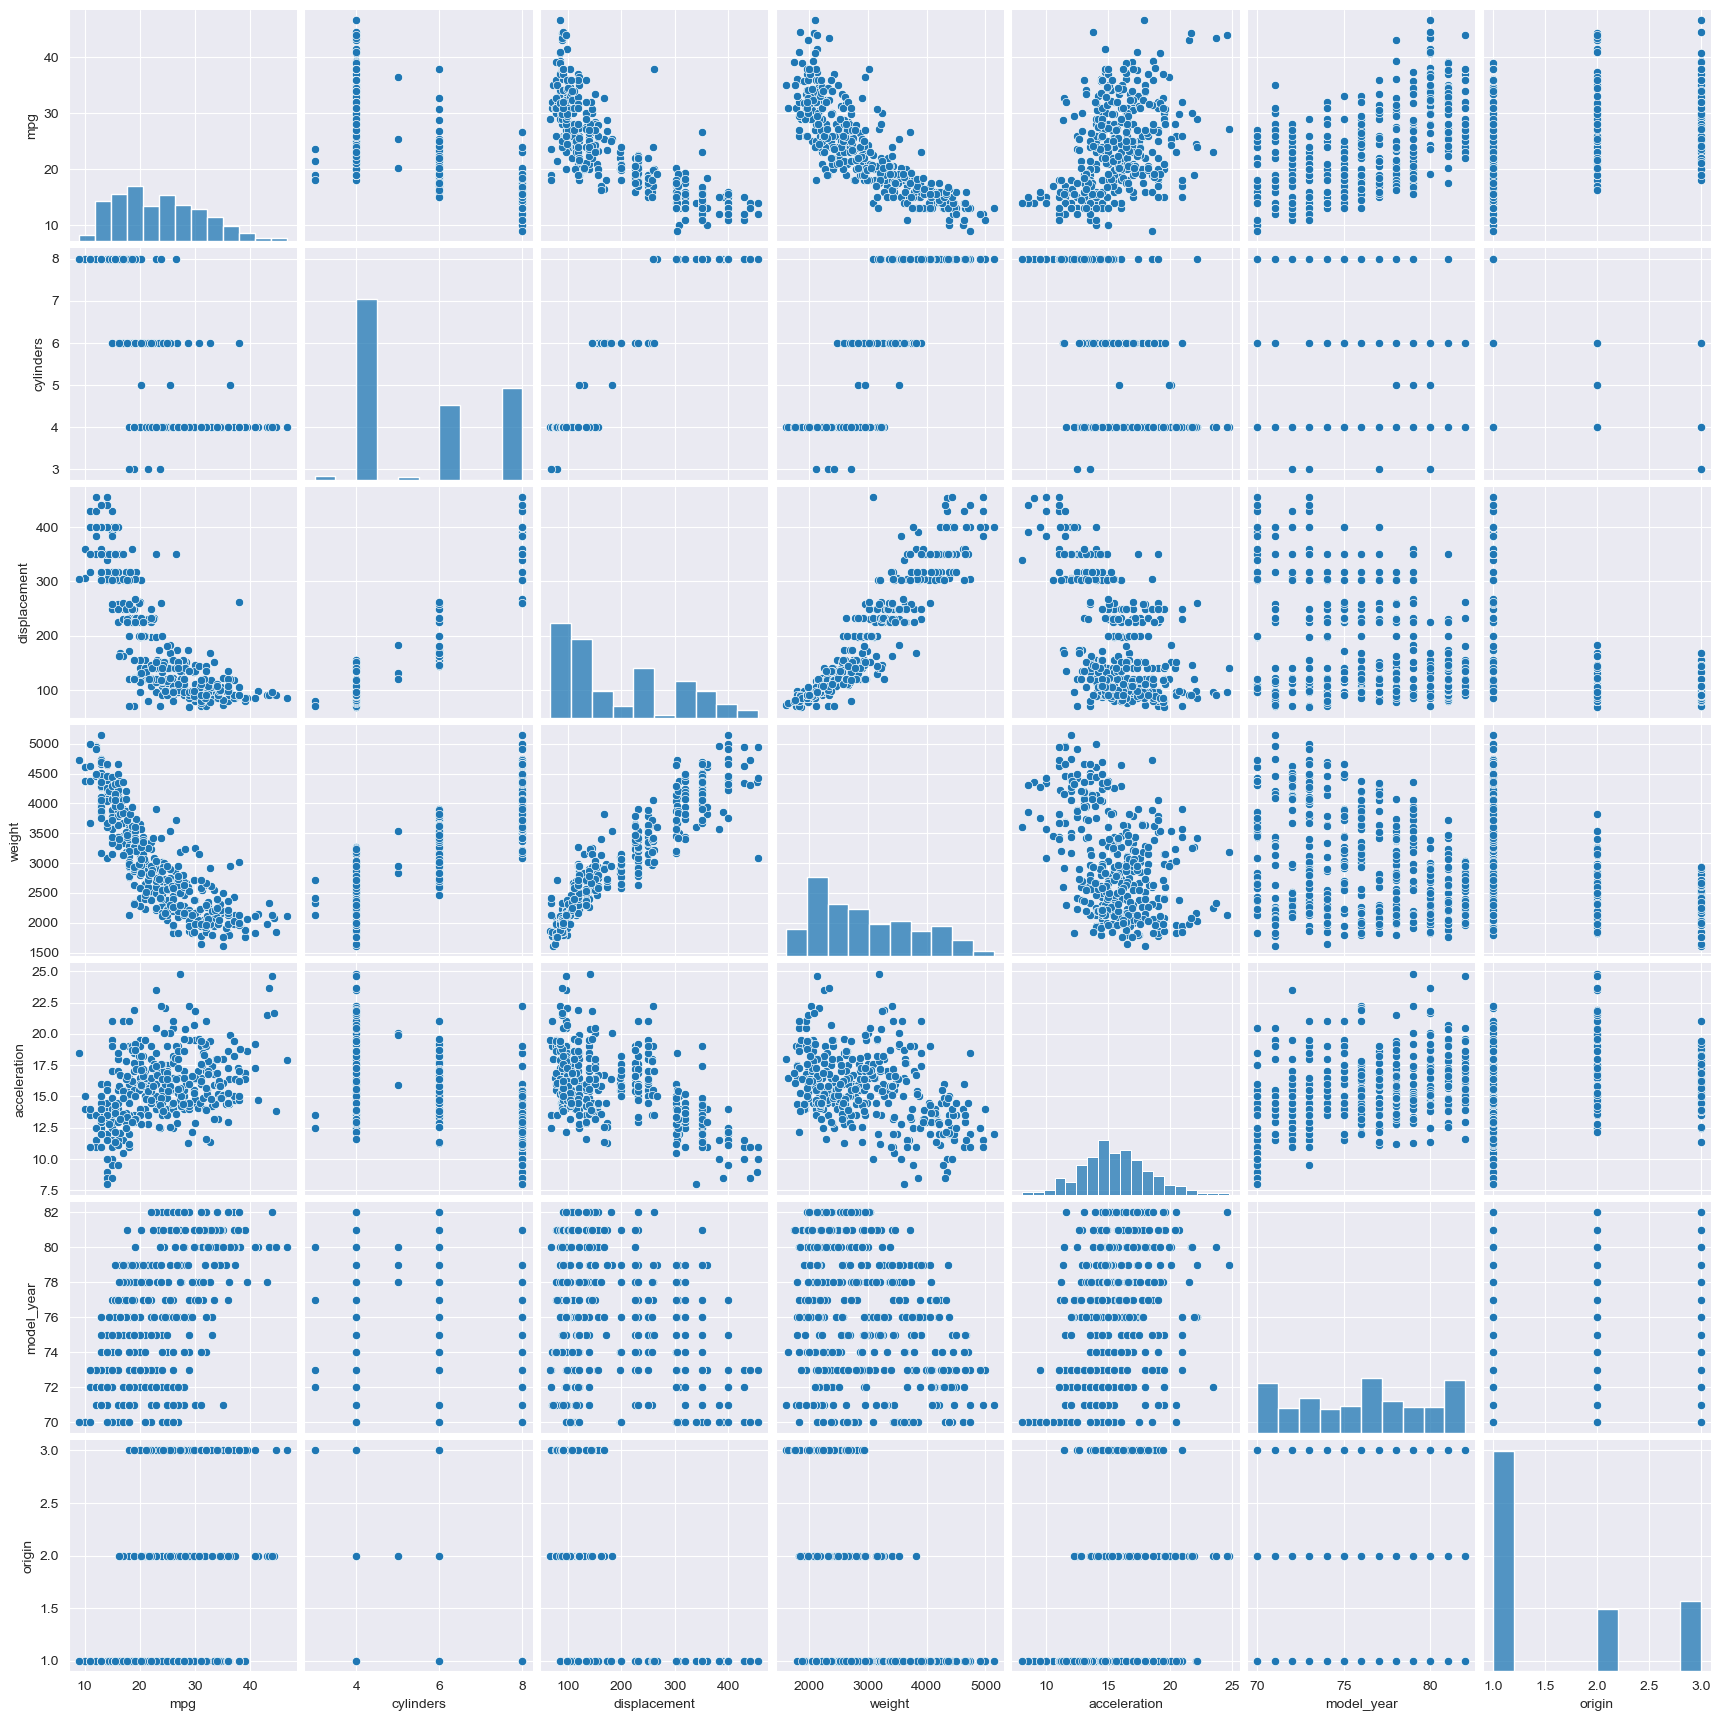

In [34]:
sns.pairplot(df)
plt.show()

### Data Quality
We learned in the lectures that data quality can be "measured" by looking at the following 3 measurements:

1.**Correctness**: From the information provided by the link to download the dataset, we can assume that the data is correct. By looking at the data itself and by plotting the data, the data looks correct (based of my general knowledge).

2.**Completeness**: The data seems to be complete, with the exception for 6 missing values for horsepower-> gets later handled in the data preparation phase.

3.**Redundancy**: By just looking at the data and the structure/schema this measurement seems to be fulfilled as well.

### Hypothesis
After looking at the data and checking the data quality following hypothesis can be established. These are only some pretty "easy" hypothesis. This is based on the scatter plots and the general knowledge gained through the data understanding via looking at the df.
1. The more cylinders the car has the higher is the fuel consumption.
2. The higher the weight the worse is the acceleration.

## Data Preparation

For this phase I just started "cleaning" the data and present some basic statistical values.

Since we got 6 missing values that are represented with a "?" the horsepower column was a string. To work with it properly I converted the "?" to 0, so it can be transformed to float.

Because of some errors in the normalization part with acceleration, the column gets to_numeric as well.

In [35]:
df["horsepower"] = df["horsepower"].replace("?", "0")
df["horsepower"] = pd.to_numeric(df["horsepower"])
df["acceleration"] = pd.to_numeric(df["acceleration"])

Then I started calculating basic statistic values to get more insights.

In [36]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,102.894472,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,40.269544,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,0.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,75.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


As we can see the min of horsepower is 0 which is not quite that good. That's why I decided to get a mean value for horsepower that can be used instead of using 0 for the missing values.

My first insight was to calculate an average for horsepower grouped to cylinders and use that as a better value than 0 (for that purpose im deleting the 0 values to get a more accurate avg).

In [37]:
df_temp = df[df["horsepower"] !=0.]
df_mean_horsepower = (df_temp.groupby("cylinders")["horsepower"].sum()/df_temp.groupby("cylinders")["horsepower"].count()).round(2)
df["horsepower"].loc[(df.horsepower==0) & (df.cylinders==3)] = df_mean_horsepower.iloc[0]
df["horsepower"].loc[(df.horsepower==0) & (df.cylinders==4)] = df_mean_horsepower.iloc[1]
df["horsepower"].loc[(df.horsepower==0) & (df.cylinders==5)] = df_mean_horsepower.iloc[2]
df["horsepower"].loc[(df.horsepower==0) & (df.cylinders==6)] = df_mean_horsepower.iloc[3]
df["horsepower"].loc[(df.horsepower==0) & (df.cylinders==8)] = df_mean_horsepower.iloc[4]


Now we can calculate the stat values again and can see that the horsepower min is changed and is now a much more plausible value than 0. By this the mean obviously changed as well.

Other than that the values look good to go. Since the CRISP-DM is an iterative process, there could be a some changes in the future.

In [38]:
df.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
count,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000,398.000000
mean,23.514573,5.454774,193.425879,104.132940,2970.424623,15.568090,76.010050,1.572864
std,7.815984,1.701004,104.269838,38.310897,846.841774,2.757689,3.697627,0.802055
min,9.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,70.000000,1.000000
25%,17.500000,4.000000,104.250000,76.000000,2223.750000,13.825000,73.000000,1.000000
50%,23.000000,4.000000,148.500000,92.000000,2803.500000,15.500000,76.000000,1.000000
75%,29.000000,8.000000,262.000000,125.000000,3608.000000,17.175000,79.000000,2.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,3.000000


### Normalization of the given data

To run an ML algorithm over the data, it is necessary to normalize the (continuous) values in the column. I used the min-max normalization here to have values in the range[0,1]. With these normalized values you can determine a correlation matrix to see if there is a relationship between two values (later used in Evaluation).

In [39]:
normalized_df = df
normalized_df[continuous_values] = (df[continuous_values]- df[continuous_values].min()) / (df[continuous_values].max() - df[continuous_values].min())
normalized_df.corr()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin
mpg,1.000000,-0.775396,-0.804203,-0.775608,-0.831741,0.420289,0.579267,0.563450
cylinders,-0.775396,1.000000,0.950721,0.843794,0.896017,-0.505419,-0.348746,-0.562543
displacement,-0.804203,0.950721,1.000000,0.897520,0.932824,-0.543684,-0.370164,-0.609409
horsepower,-0.775608,0.843794,0.897520,1.000000,0.863600,-0.688022,-0.416841,-0.450352
weight,-0.831741,0.896017,0.932824,0.863600,1.000000,-0.417457,-0.306564,-0.581024
acceleration,0.420289,-0.505419,-0.543684,-0.688022,-0.417457,1.000000,0.288137,0.205873
model_year,0.579267,-0.348746,-0.370164,-0.416841,-0.306564,0.288137,1.000000,0.180662
origin,0.563450,-0.562543,-0.609409,-0.450352,-0.581024,0.205873,0.180662,1.000000


### splitting the data set into training and set dataframes

For the purpose of running an ML Algorithm I divided the df into two dataframes (with the distribution of 70:30). The 30% df is getting used to validate the trained model.

In [40]:
split_point = int((len(df)*0.7))
training_df = normalized_df.iloc[:split_point, :]
test_df = normalized_df.iloc[split_point:, :]

## Modeling
Since we want to find some patterns in the data, I decided to use Clustering. My first approach was to cluster the (training) dataset into 3 clusters with KMeans. I used a library for that. Since we got discrete values and a distance doesn't make much sense here, I focused on the continuous values of the dataset.

In [41]:
kmeans = KMeans(n_clusters=3)
training_df["clusters"] = kmeans.fit_predict(training_df[continuous_values])
cluster_count= training_df["clusters"].value_counts()
cluster_one = training_df[training_df["clusters"] == 0]
cluster_two = training_df[training_df["clusters"] == 1]
cluster_three = training_df[training_df["clusters"] == 2]

### Create by statistical values
After that we now calculate the statistical values again. This could give us insights which can help in verifying/falsifying the data. These values are later used to evaluate the hypothesis.

In [42]:
cluster_one.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,clusters
count,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.000000,73.0
mean,0.262679,5.931507,0.387420,0.296643,0.460366,0.508806,74.835616,1.191781,0.0
std,0.054607,0.673481,0.100561,0.060629,0.095738,0.110841,2.460881,0.490395,0.0
min,0.159574,4.000000,0.134367,0.141304,0.276155,0.297619,70.000000,1.000000,0.0
25%,0.239362,6.000000,0.341085,0.266304,0.382478,0.446429,73.000000,1.000000,0.0
50%,0.265957,6.000000,0.421189,0.293478,0.455912,0.476190,75.000000,1.000000,0.0
75%,0.297872,6.000000,0.470284,0.336957,0.517720,0.571429,77.000000,1.000000,0.0
max,0.398936,8.000000,0.501292,0.472826,0.693791,0.827381,78.000000,3.000000,0.0


In [43]:
cluster_two.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,clusters
count,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.000000,90.0,90.0
mean,0.141578,7.977778,0.726414,0.638647,0.721706,0.269048,73.211111,1.0,1.0
std,0.056311,0.210819,0.121090,0.141697,0.127832,0.105933,2.524017,0.0,0.0
min,0.000000,6.000000,0.421189,0.402174,0.417635,0.000000,70.000000,1.0,1.0
25%,0.106383,8.000000,0.617571,0.542120,0.635668,0.208333,71.000000,1.0,1.0
50%,0.132979,8.000000,0.728682,0.565217,0.736887,0.267857,73.000000,1.0,1.0
75%,0.172872,8.000000,0.827519,0.701087,0.804933,0.327381,75.000000,1.0,1.0
max,0.297872,8.000000,1.000000,1.000000,1.000000,0.625000,78.000000,1.0,1.0


In [44]:
cluster_three.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,clusters
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.0
mean,0.469033,3.991304,0.098292,0.184512,0.181396,0.502795,74.278261,2.043478,2.0
std,0.117368,0.247643,0.052827,0.084632,0.084490,0.136102,2.497535,0.799027,0.0
min,0.239362,3.000000,0.000000,0.000000,0.000000,0.250000,70.000000,1.000000,2.0
25%,0.398936,4.000000,0.059432,0.130435,0.122625,0.386905,72.000000,1.000000,2.0
50%,0.452128,4.000000,0.077519,0.184783,0.173802,0.476190,74.000000,2.000000,2.0
75%,0.531915,4.000000,0.136951,0.239130,0.239439,0.595238,76.500000,3.000000,2.0
max,0.906915,6.000000,0.224806,0.375000,0.387298,0.922619,78.000000,3.000000,2.0


### Validate the results with test_df
To validate the results, we are doing the exact same thing with the test dataset and look if the statistical values are in the same range.

In [45]:
kmeans_test = KMeans(n_clusters=3)
test_df["clusters"] = kmeans_test.fit_predict(test_df[continuous_values])
cluster_count_test= test_df["clusters"].value_counts()
cluster_one_test = test_df[test_df["clusters"] == 0]
cluster_two_test = test_df[test_df["clusters"] == 1]
cluster_three_test = test_df[test_df["clusters"] == 2]

In [46]:
cluster_one_test.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,clusters
count,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.000000,46.0
mean,0.492889,4.478261,0.205370,0.241441,0.334944,0.504011,80.717391,1.500000,0.0
std,0.095091,0.887922,0.076589,0.074718,0.068511,0.173095,1.128678,0.809664,0.0
min,0.287234,3.000000,0.005168,0.114130,0.218883,0.196429,79.000000,1.000000,0.0
25%,0.436170,4.000000,0.173127,0.198370,0.285866,0.380952,80.000000,1.000000,0.0
50%,0.484043,4.000000,0.200258,0.228261,0.314573,0.500000,81.000000,1.000000,0.0
75%,0.557181,4.750000,0.227390,0.250000,0.376595,0.611607,82.000000,2.000000,0.0
max,0.771277,6.000000,0.501292,0.467391,0.543521,1.000000,82.000000,3.000000,0.0


In [47]:
cluster_two_test.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,clusters
count,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.000000,18.0,18.0
mean,0.287086,7.222222,0.565748,0.394928,0.571559,0.479497,79.555556,1.0,1.0
std,0.078735,1.003263,0.142803,0.116384,0.103285,0.139957,0.983524,0.0,0.0
min,0.172872,6.000000,0.405685,0.211957,0.346470,0.297619,79.000000,1.0,1.0
25%,0.228723,6.000000,0.421835,0.327446,0.503686,0.401786,79.000000,1.0,1.0
50%,0.269947,8.000000,0.559432,0.402174,0.581798,0.440476,79.000000,1.0,1.0
75%,0.342420,8.000000,0.728682,0.476902,0.644174,0.547619,79.750000,1.0,1.0
max,0.468085,8.000000,0.754522,0.592391,0.778849,0.845238,82.000000,1.0,1.0


In [48]:
cluster_three_test.describe()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,clusters
count,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.000000,56.0
mean,0.713241,4.017857,0.078535,0.128160,0.143941,0.505315,80.589286,2.267857,2.0
std,0.104160,0.133631,0.032363,0.049112,0.057983,0.146454,1.124549,0.820002,0.0
min,0.545213,4.000000,0.028424,0.010870,0.040261,0.214286,78.000000,1.000000,2.0
25%,0.634309,4.000000,0.054264,0.103261,0.103700,0.410714,80.000000,2.000000,2.0
50%,0.692819,4.000000,0.074935,0.119565,0.144457,0.479167,81.000000,2.500000,2.0
75%,0.765293,4.000000,0.095607,0.157609,0.169620,0.574405,82.000000,3.000000,2.0
max,1.000000,5.000000,0.173127,0.250000,0.379076,0.988095,82.000000,3.000000,2.0


## Evaluation

### Difference between training and test clustering
Since we only got the roughly 400 entries, the test of the clustering differs from the training clustering. By distributing the cluster into 70:30, the datasets are too small and basically deliver different values.

Still you can see, that there are some values in the cluster are pretty equal. For example the clusters (in training and testing) with the cylinder-median of 8 have the worst mpg ratio (the lower the normalized mpg the higher is the gas consumption). Some other means are also similar in terms of the overall rating.

This leaves me to the conclusion that, even though the dataset is too small to deliver equal results, the testing shows that the clustering is mostly correct.

### Checking the hypothesis
In the following I looked at the hypothesis and tried to draw a conclusion based on the k means clustering.

1.*The more cylinders the car has the higher is the fuel consumption*. 

**Conclusion**:By looking at the clustering out of the training_df, we can see, that cluster with a cylinder median of 8 has the worst mpg with a mean of 0.141578. Since the cylinder mean here is also 7.977778 you can assume that most of the cars in this cluster has 8 cylinders. The cluster with a cylinder median of 6 has a slightly better mpg mean of 0.262679. The best mpg mean of 0.469033 has the cluster with the cylinder median of 4. Based on this you can assume that the hypothesis is true.

2.*The higher the weight the worse is the acceleration*

**Conclusion**: Since we got a cluster with a weight mean of 0.460366 and an acceleration mean of 0.508806 and a cluster with a weight 00.181396 and acceleration mean of 0.502795 I would falsify the hypothesis since you got a similar acceleration out of both clusters but the weight differ about 0.3, you cant define the acceleration based on the weight.

### Patterns
By looking at the hypothesis we already can say that there is a pattern with cylinders and fuel consumption and there is no pattern with weight and acceleration.

To look for more patterns I looked at some scatter plots and "colored" the dots into the clusters the value is located.

Firstly, lets look at displacement and horsepower, since the correlation coefficient is pretty high with 0.896017.


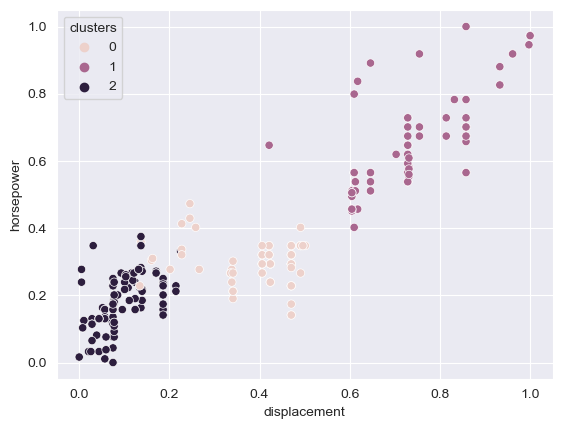

In [49]:
sns.scatterplot(data=training_df, x=training_df["displacement"], y=training_df["horsepower"], hue=training_df["clusters"])
plt.show()

As you can see here the clusters rarely overlap. This (and the correlation coefficient) got me thinking that there is a pattern. It looks like, that the higher the displacement that this also indicates that the horsepower is pretty high as well. This effect can be seen in the other clusters too.

This is an example of finding Patterns. Out of time reasons  I won't analyze some more patterns, since the basic concept of my approach should be clear.

### Conclusion

This jupyter notebook runs through most of the core-phases of the *CRISP-DM* phases, except the *business understanding* and the *deployment* phase.

In the *data understanding* phase I gained some basic knowledge of the dataset by analyzing the columns and looking at different plots of the data. By this I could describe the data representation in the different columns and check the data quality. Since there was no *business understanding* phase I established some hypothesis to be later tested and have a "goal".

In the *data preparation* phase I dealt with the missing horsepower values. My first approach was to just replace the missing values with 0. This led (obviously) to a min value 0 which I wasn't satisfied with. Because of this I decided to get an average value of horsepower grouped by the cylinders. I made the assumption that the cylinders have an influence on the horsepower (also has a high correlation coefficient). After that I normalized the (       continues) values by using a *min-max normalization*.

For the *modeling* phase I decided to use the KMeans Algorithm to cluster the different entries. Since we learned in the lecture as well that you always should use a training and test dataset. This is the reason why I split the normalized_df into 70:30 portions and then did the Algorithm with both df. The results differ a bit, but this is due to the small dataset (test data only had 80 entries). Still there were quite a few similarities which means, that both runs of the algorithm deliver similar results and therefor are valid.

The *evaluation* phase then explained that hypothesis 1 could be verified and hypothesis 1 could be falsified. Also, there was a pattern detected between displacement and horsepower.
